<a href="https://colab.research.google.com/github/yuja1130/AIpython./blob/main/20240524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습**


## **붓꽃 데이터 읽어와서 확인하기**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. 데이터 파일 읽어오기
df = pd.read_csv("/content/drive/MyDrive/AI이해를위한파이썬/실습데이터 2/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# 2. 데이터의 기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# 3. 데이터의 기초 통계량 출력
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
# 4. 품종별 개수 구하기
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## **붓꽃 데이터 전처리**

In [56]:
# 1. 결측치 확인하기
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# 2. 중복 데이터 확인하기
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [60]:
# 3. 중복 데이터 모두 확인하기
idx = (df["sepal_length"] == 5.8) & (df["petal_width"] == 1.9)
df.loc[idx,:]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [11]:
# 4. 중복 데이터 삭제하기
df2 = df.drop_duplicates()
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## **붓꽃 데이터 그룹핑**

In [15]:
# 1. 품종(species) 열을 기준으로 합계 구하기
df2.groupby("species").sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [29]:
# 2. 품종(species) 열을 기준으로 평균 구하기
df2.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


## **붓꽃 데이터 시각화**

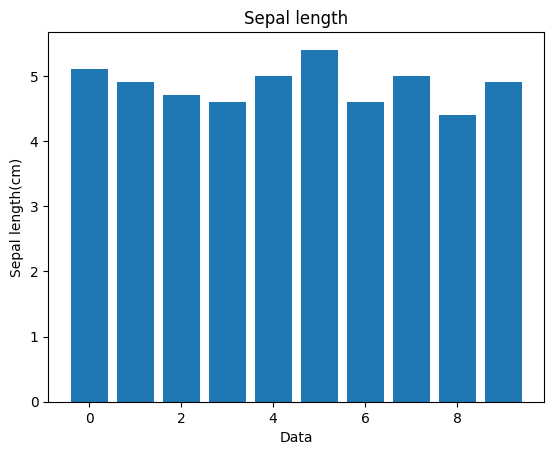

In [65]:
# 1-1. 꽃받침 길이의 시각화(막대그래프)
plt.bar(df.index[:10], df.sepal_length[:10])
plt.title("Sepal length")
plt.xlabel("Data")
plt.ylabel("Sepal length(cm)")
plt.show()

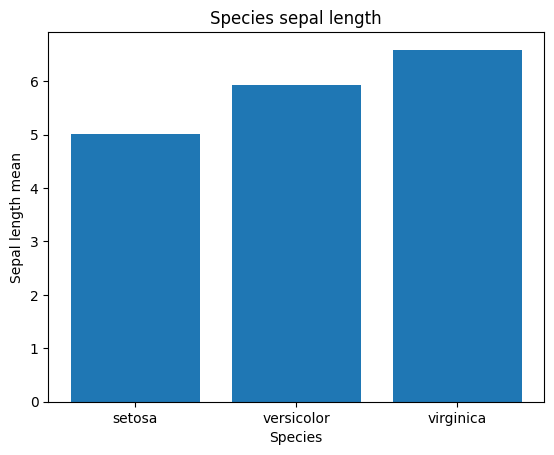

In [63]:
# 1-2. 붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화(막대그래프)
df3 = df.groupby("species").mean()
plt.bar(df3.index, df3["sepal_length"])
plt.title("Species sepal length")
plt.xlabel("Species")
plt.ylabel("Sepal length mean")
plt.show()

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 22.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

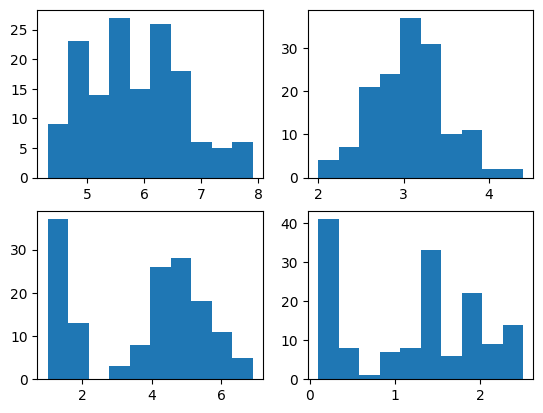

In [69]:
# 2. 히스토그램 그래프 그리기 : 각 특징(4가지) 값들의 빈도수에 대한 시각화

fig, axs = plt.subplots(2,2)

axs[0,0].hist(df2["sepal_length"])
axs[0,1].hist(df2["sepal_width"])
axs[1,0].hist(df2["petal_length"])
axs[1,1].hist(df2["petal_width"])

<Axes: xlabel='petal_length', ylabel='petal_width'>

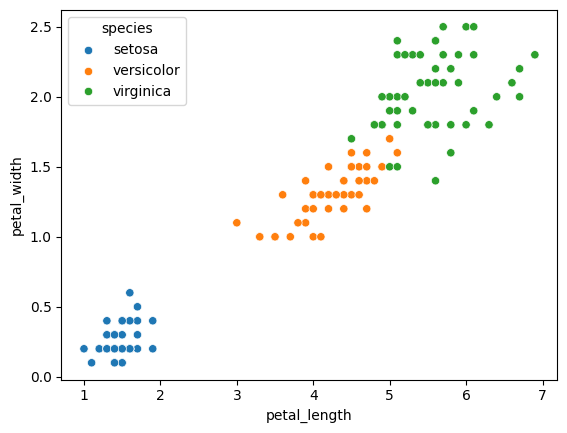

In [49]:
# 3. 산점도 그래프 그리기 : 꽃받침의 길이와 꽃임의 길이의 산점도를 시각화
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data = df2)